### **INSERT DATA**

In [ ]:
import pandas as pd
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import lars_path
from sklearn.linear_model import LinearRegression, Lasso, LassoCV,RidgeCV,Ridge,ElasticNet,ElasticNetCV
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
train = pd.read_csv ('/content/proper.csv')

In [ ]:
train

,Property_Key,Property_ID,Latitude,Longitude,Accommodates,Availability_365,Has_availability,Reviews_per_month,Calculated_host_listings_count,Property_type,Instant_bookable,Room_type,Bedrooms,Beds,Bathrooms,Bathrooms_type,Neighbourhood_cleansed,Number_of_reviews,Number_of_reviews_l30d,Review_scores_rating,Review_scores_accuracy,Review_scores_checkin,Review_scores_cleanliness,Review_scores_communication,Review_scores_location,Review_scores_value,Amenity_Count,avgprice
0,1783,21362019,52.35535,4.92149,2,0,1,0.25,3,Private room in apartment,1,Private room,1,1,1.0,private bath(s),Oud-Oost,9,0,98,10,10,10,10,10,9,5,80.027397
1,1784,21687136,52.38951,4.87910,3,47,1,0.34,7,Private room in apartment,0,Private room,1,1,1.0,shared bath(s),Westerpark,12,0,86,9,9,8,9,9,9,12,66.136986
2,1785,22273164,52.37418,4.96368,2,0,1,0.86,1,Private room in apartment,1,Private room,1,1,1.0,shared bath(s),IJburg - Zeeburgereiland,29,0,99,10,10,10,10,10,10,30,80.328767
3,1786,22340003,52.37875,4.87558,2,0,1,0.17,2,Private room in apartment,0,Private room,1,2,2.0,shared bath(s),Westerpark,4,0,100,10,10,10,10,10,8,19,199.000000
4,1787,22366904,52.36008,4.89182,2,283,1,1.09,1,Private room in apartment,0,Private room,1,1,1.0,private bath(s),Centrum-Oost,37,0,97,10,10,10,10,10,9,19,120.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,8918,26907262,52.34411,4.89334,4,0,1,0.38,1,Entire apartment,1,Entire home/apt,2,3,1.0,shared bath(s),De Pijp - Rivierenbuurt,10,0,100,10,10,10,10,10,10,10,164.484931
18778,8919,26931465,52.36778,4.86445,2,2,1,0.72,1,Entire apartment,0,Entire home/apt,1,1,1.5,shared bath(s),De Baarsjes - Oud-West,19,0,100,10,10,9,10,10,9,27,110.054794
18779,8920,26943704,52.35295,4.84731,2,0,1,0.15,1,Entire apartment,1,Entire home/apt,1,1,1.0,shared bath(s),Zuid,4,0,95,10,10,9,10,9,9,19,70.000000
18780,8921,26953875,52.36586,4.87248,2,0,1,0.15,1,Entire apartment,0,Entire home/apt,1,1,1.5,shared bath(s),De Baarsjes - Oud-West,4,0,100,10,10,10,10,10,10,14,110.000000


In [ ]:
train.isnull().sum()

Property_Key                      0
Property_ID                       0
Latitude                          0
Longitude                         0
Accommodates                      0
Availability_365                  0
Has_availability                  0
Reviews_per_month                 0
Calculated_host_listings_count    0
Property_type                     0
Instant_bookable                  0
Room_type                         0
Bedrooms                          0
Beds                              0
Bathrooms                         0
Bathrooms_type                    5
Neighbourhood_cleansed            0
Number_of_reviews                 0
Number_of_reviews_l30d            0
Review_scores_rating              0
Review_scores_accuracy            0
Review_scores_checkin             0
Review_scores_cleanliness         0
Review_scores_communication       0
Review_scores_location            0
Review_scores_value               0
Amenity_Count                     0
avgprice                    

In [ ]:
train=train.dropna()


In [ ]:
train['avgprice'].describe()

count    18777.000000
mean       162.896918
std        174.302646
min          5.000000
25%         99.032877
50%        134.332425
75%        189.000000
max       8000.000000
Name: avgprice, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


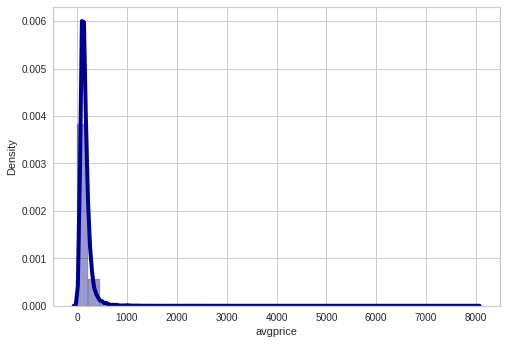

In [ ]:
sns.distplot(train['avgprice'], hist=True, kde=True, bins=int(180/5), color = 'darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

In [ ]:
train['Property_type']=train['Property_type'].replace(['Entire condominium','Entire house','Entire place','Earth house','Entire bungalow','Entire villa','Entire cottage','Entire serviced apartment','Entire chalet','Entire floor','Entire apartment','Entire guest suite','Entire townhouse','Entire bed and breakfast','Entire guesthouse','Entire cabin','Entire loft','Entire home/apt'], 'Entire house/apt')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train['Property_type']=train['Property_type'].replace(['Private room in house','Private room in townhouse','Room in boutique hotel','Private room in guest suite','Private room in camper/rv','Private room in loft','Private room in houseboat','Private room in floor','Private room in farm stay','Private room in bed and breakfast','Private room in dome house','Private room in hostel','Room in aparthotel','Private room in villa','Private room in condominium','Private room in apartment','Room in hostel','Private room in serviced apartment','Private room in earth house','Private room in cabin','Room in serviced apartment','Room in hotel','Private room in island','Private room in guesthouse','Private room in tiny house','Private room in boat','Room in casa particular','Private room in bungalow','Room in bed and breakfast'], 'Private room')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train['Property_type']=train['Property_type'].replace(['Shared room in hostel','Shared room in house','Shared room in apartment','Shared room in bed and breakfast','Shared room in camper/rv','Shared room in boat','Shared room in loft','Shared room in houseboat'], 'Shared room')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train['Property_type']=train['Property_type'].replace(['Cave','Houseboat','Boat','Tiny house','Barn','Yurt','Campsite','Tipi','Lighthouse','Camper/RV','Bus'], 'Other')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.describe().drop(columns=['Property_ID','Property_Key'])

,Latitude,Longitude,Accommodates,Availability_365,Has_availability,Reviews_per_month,Calculated_host_listings_count,Instant_bookable,Bedrooms,Beds,Bathrooms,Number_of_reviews,Number_of_reviews_l30d,Review_scores_rating,Review_scores_accuracy,Review_scores_checkin,Review_scores_cleanliness,Review_scores_communication,Review_scores_location,Review_scores_value,Amenity_Count,avgprice
count,18777.000000,18777.000000,18777.000000,18777.000000,18777.0,18777.000000,18777.000000,18777.000000,18777.000000,18777.000000,18777.000000,18777.000000,18777.000000,18777.00000,18777.000000,18777.000000,18777.000000,18777.000000,18777.000000,18777.000000,18777.000000,18777.000000
mean,52.365470,4.889646,2.845929,53.624487,1.0,0.616104,2.582415,0.265484,1.450498,1.761517,1.193082,24.738510,0.128455,82.29648,8.380093,8.426319,8.181978,8.468765,8.220483,7.949353,18.991585,162.896918
std,0.016497,0.035924,1.285370,107.389528,0.0,1.264872,8.631199,0.441603,0.920932,1.447749,0.406346,54.718392,0.896252,33.17362,3.388716,3.401486,3.348215,3.407818,3.329152,3.248421,8.712893,174.302646
min,52.289270,4.755720,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
25%,52.355130,4.863890,2.000000,0.000000,1.0,0.090000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,90.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,12.000000,99.032877
50%,52.364730,4.887030,2.000000,0.000000,1.0,0.270000,1.000000,0.000000,1.000000,1.000000,1.000000,8.000000,0.000000,96.00000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,17.000000,134.332425
75%,52.375370,4.909390,4.000000,41.000000,1.0,0.610000,1.000000,1.000000,2.000000,2.000000,1.500000,23.000000,0.000000,100.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,25.000000,189.000000
max,52.425120,5.068080,16.000000,365.000000,1.0,47.610000,86.000000,1.000000,30.000000,33.000000,13.000000,856.000000,60.000000,100.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,60.000000,8000.000000


In [ ]:
train["log_price"]=np.log(train["avgprice"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


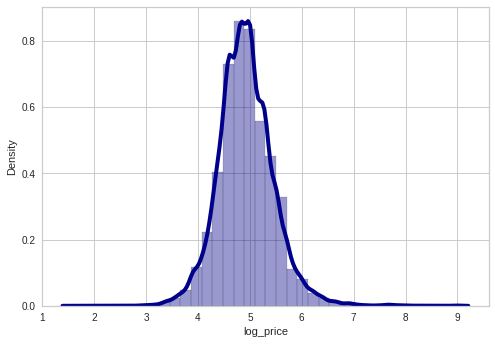

In [ ]:
sns.distplot(train['log_price'], hist=True, kde=True, bins=int(180/5), color = 'darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

In [ ]:
train['log_price'].describe()

count    18777.000000
mean         4.924357
std          0.530360
min          1.609438
25%          4.595452
50%          4.900318
75%          5.241747
max          8.987197
Name: log_price, dtype: float64

<Figure size 1440x432 with 0 Axes>

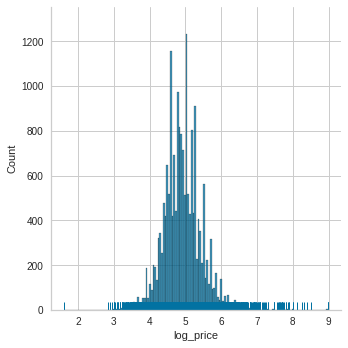

In [ ]:
plt.figure(figsize=(20,6))
sns.displot(train['log_price'],rug=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


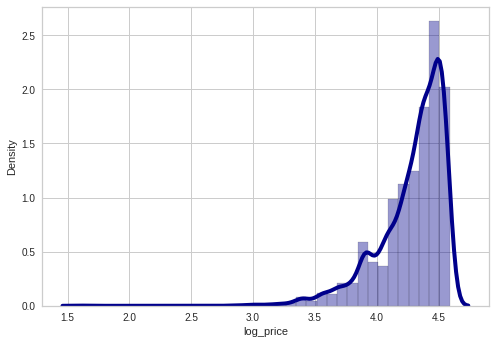

In [ ]:
quantile1=train.drop(train.index[train['log_price'] >4.59])
sns.distplot(quantile1['log_price'], hist=True, kde=True, bins=int(180/5), color = 'darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


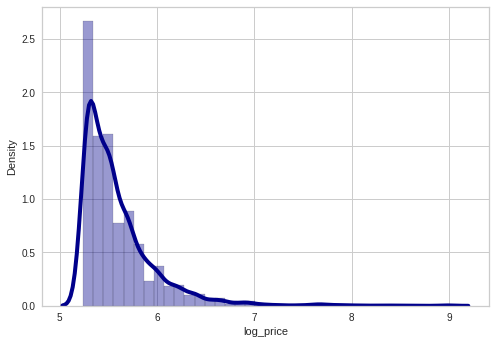

In [ ]:
quantile2=train.drop(train.index[train['log_price']<5.24])
sns.distplot(quantile2['log_price'], hist=True, kde=True, bins=int(180/5), color = 'darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})


In [ ]:
train.drop(train.index[train['log_price'] <3.5], inplace = True)
train.drop(train.index[train['log_price'] >6.3], inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18457 entries, 0 to 18781
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Property_Key                    18457 non-null  int64  
 1   Property_ID                     18457 non-null  int64  
 2   Latitude                        18457 non-null  float64
 3   Longitude                       18457 non-null  float64
 4   Accommodates                    18457 non-null  int64  
 5   Availability_365                18457 non-null  int64  
 6   Has_availability                18457 non-null  int64  
 7   Reviews_per_month               18457 non-null  float64
 8   Calculated_host_listings_count  18457 non-null  int64  
 9   Property_type                   18457 non-null  object 
 10  Instant_bookable                18457 non-null  int64  
 11  Room_type                       18457 non-null  object 
 12  Bedrooms                        

In [ ]:
train2=train.drop(['Property_ID','avgprice','Property_Key','Property_type'],axis=1)
train2.head()

,Latitude,Longitude,Accommodates,Availability_365,Has_availability,Reviews_per_month,Calculated_host_listings_count,Instant_bookable,Room_type,Bedrooms,Beds,Bathrooms,Bathrooms_type,Neighbourhood_cleansed,Number_of_reviews,Number_of_reviews_l30d,Review_scores_rating,Review_scores_accuracy,Review_scores_checkin,Review_scores_cleanliness,Review_scores_communication,Review_scores_location,Review_scores_value,Amenity_Count,log_price
0,52.35535,4.92149,2,0,1,0.25,3,1,Private room,1,1,1.0,private bath(s),Oud-Oost,9,0,98,10,10,10,10,10,9,5,4.382369
1,52.38951,4.87910,3,47,1,0.34,7,0,Private room,1,1,1.0,shared bath(s),Westerpark,12,0,86,9,9,8,9,9,9,12,4.191728
2,52.37418,4.96368,2,0,1,0.86,1,1,Private room,1,1,1.0,shared bath(s),IJburg - Zeeburgereiland,29,0,99,10,10,10,10,10,10,30,4.386128
3,52.37875,4.87558,2,0,1,0.17,2,0,Private room,1,2,2.0,shared bath(s),Westerpark,4,0,100,10,10,10,10,10,8,19,5.293305
4,52.36008,4.89182,2,283,1,1.09,1,0,Private room,1,1,1.0,private bath(s),Centrum-Oost,37,0,97,10,10,10,10,10,9,19,4.787492


In [ ]:
train2.isnull().sum()

Latitude                          0
Longitude                         0
Accommodates                      0
Availability_365                  0
Has_availability                  0
Reviews_per_month                 0
Calculated_host_listings_count    0
Instant_bookable                  0
Room_type                         0
Bedrooms                          0
Beds                              0
Bathrooms                         0
Bathrooms_type                    0
Neighbourhood_cleansed            0
Number_of_reviews                 0
Number_of_reviews_l30d            0
Review_scores_rating              0
Review_scores_accuracy            0
Review_scores_checkin             0
Review_scores_cleanliness         0
Review_scores_communication       0
Review_scores_location            0
Review_scores_value               0
Amenity_Count                     0
log_price                         0
dtype: int64

### EXPLORATORY DATA **ANALYSIS**

<Figure size 1440x432 with 0 Axes>

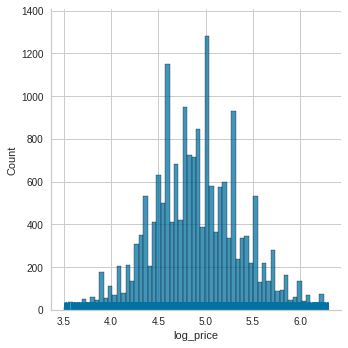

In [ ]:
plt.figure(figsize=(20,6))
sns.displot(train2['log_price'],rug=True)

In [ ]:
train2['log_price'].describe()

count    18457.000000
mean         4.906654
std          0.475776
min          3.500898
25%          4.595397
50%          4.888688
75%          5.220356
max          6.295918
Name: log_price, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.092279
Kurtosis: 0.046570


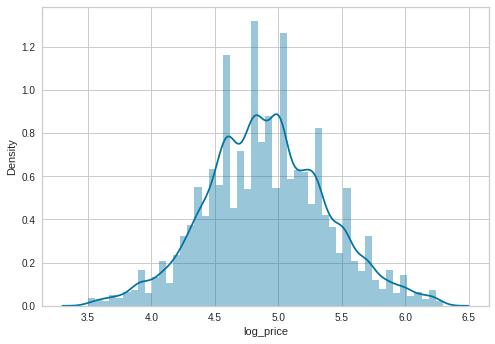

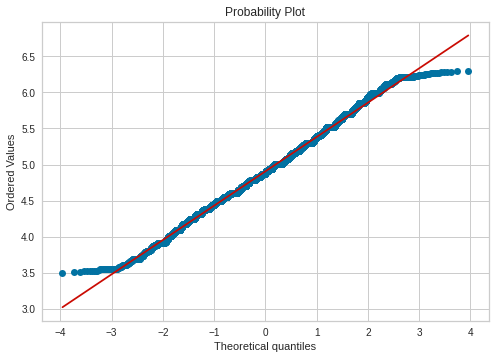

In [ ]:
sns.distplot(train2['log_price'], kde=True,);
fig = plt.figure()
res = stats.probplot(train['log_price'], plot=plt)
print("Skewness: %f" % train['log_price'].skew())
print("Kurtosis: %f" % train['log_price'].kurt())

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


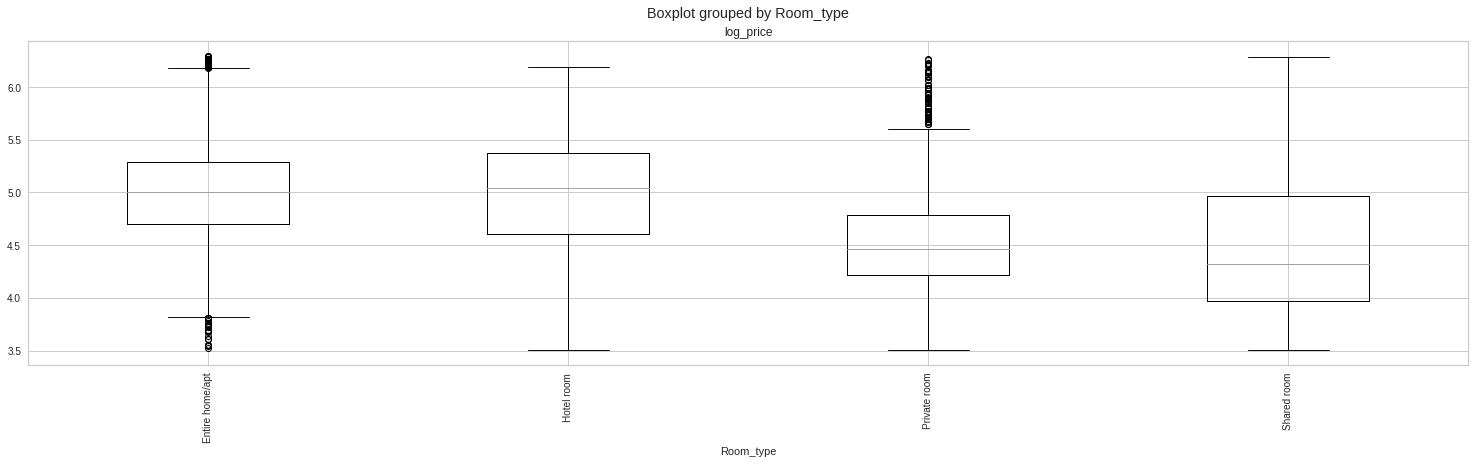

In [ ]:
train2.boxplot(column='log_price',by='Room_type',figsize=(25,6),rot=90)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


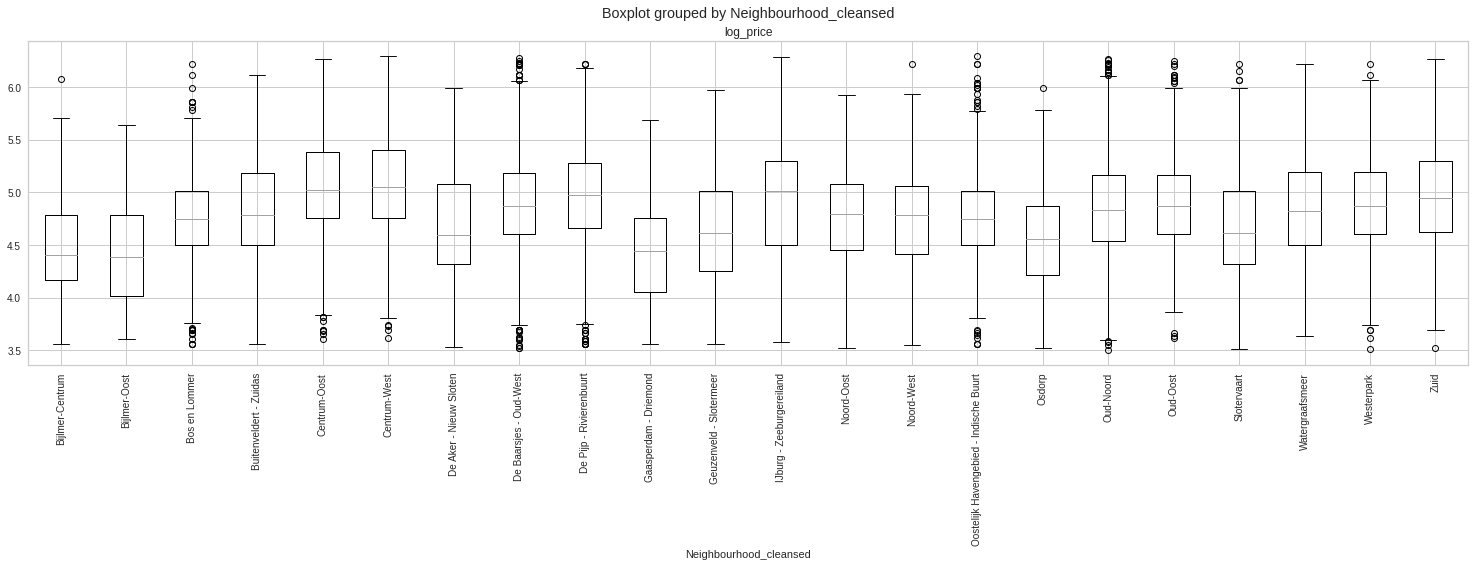

In [ ]:
train2.boxplot(column='log_price',by='Neighbourhood_cleansed',figsize=(25,6),rot=90)

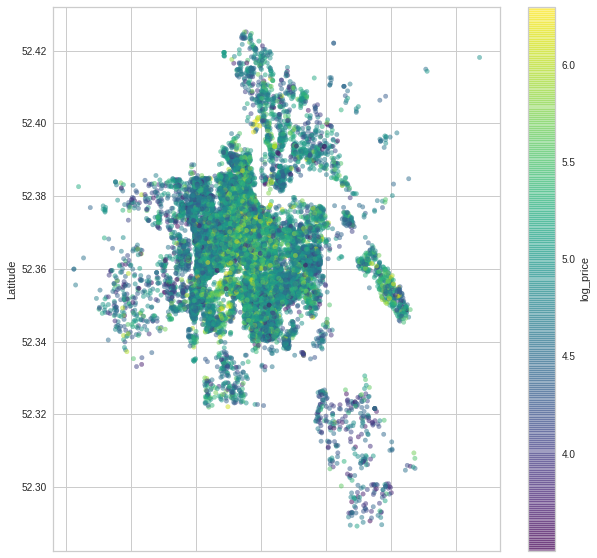

In [ ]:
train2.plot.scatter(x='Longitude',y='Latitude',c='log_price',figsize=(10,10),cmap='viridis',alpha=0.5);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


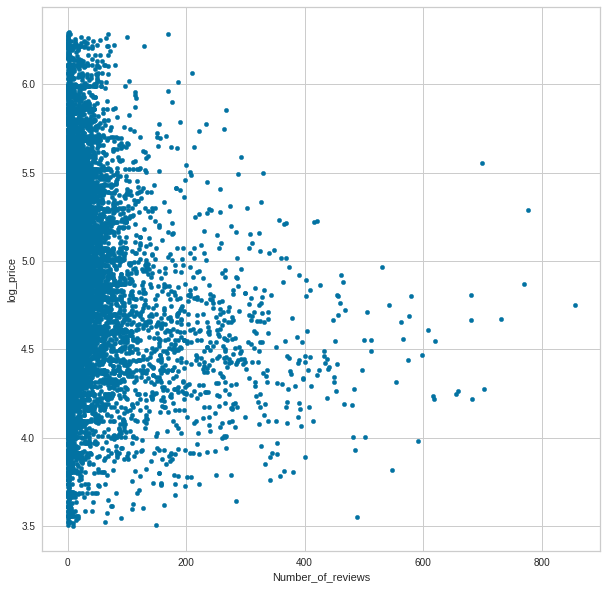

In [ ]:
train2.plot.scatter(y='log_price',x='Number_of_reviews',figsize=(10,10));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


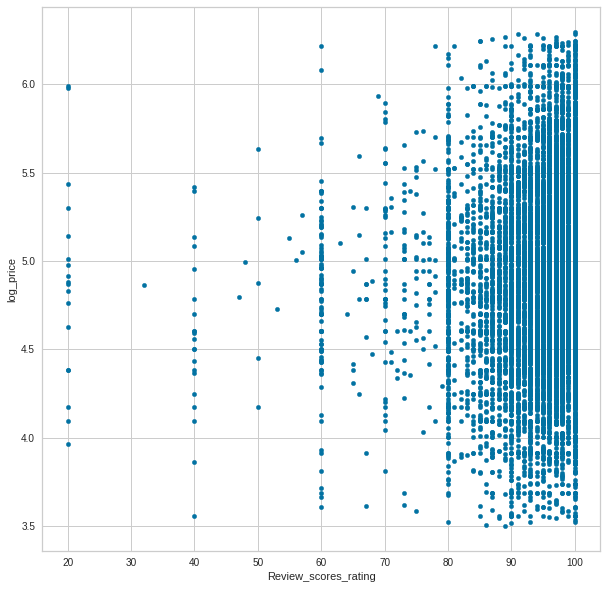

In [ ]:
train2[train2['Review_scores_rating']>0].plot.scatter(x='Review_scores_rating',y='log_price',figsize=(10,10));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


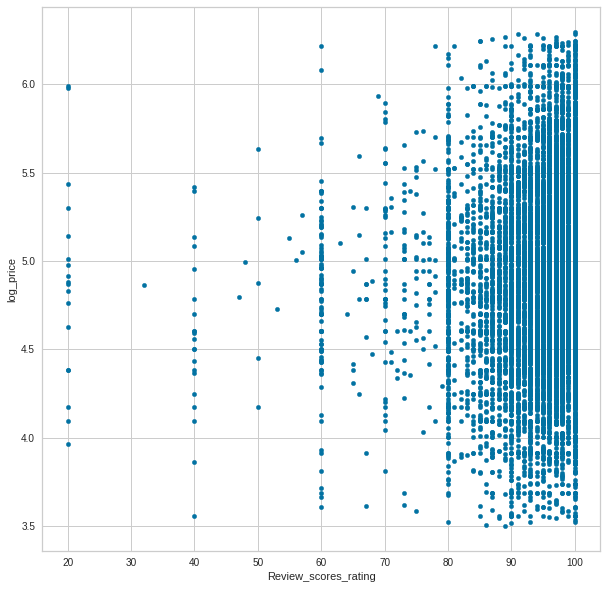

In [ ]:
train2[train2['Review_scores_rating']>0.8].plot.scatter(x='Review_scores_rating',y='log_price',figsize=(10,10));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


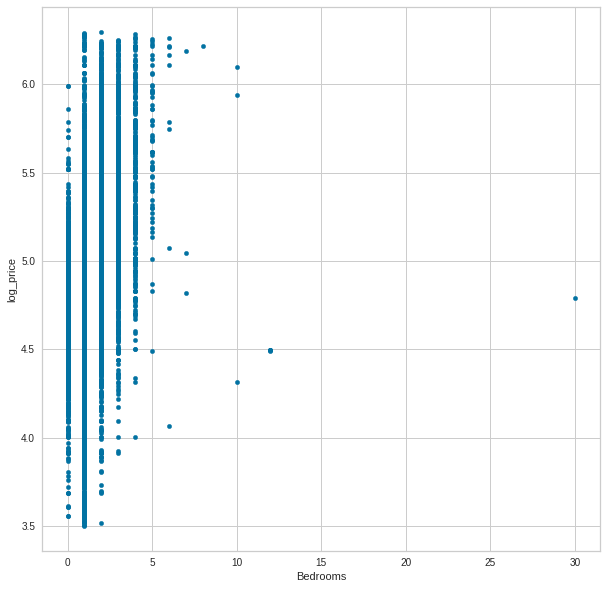

In [ ]:
train2.plot.scatter(x='Bedrooms',y='log_price',figsize=(10,10));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


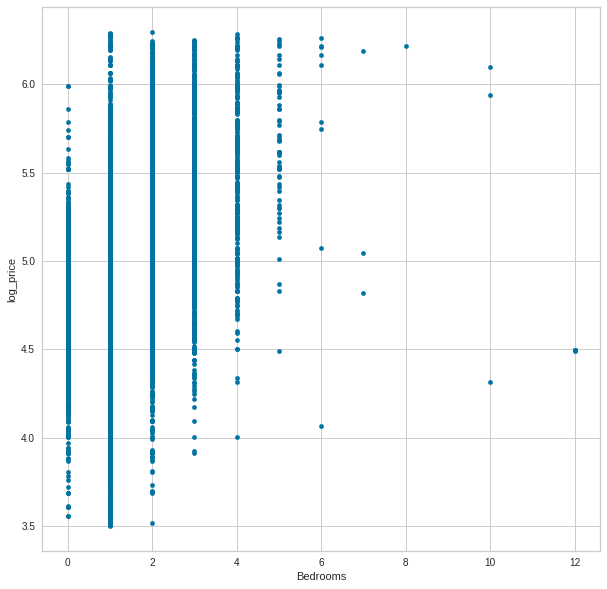

In [ ]:
train2[train2['Bedrooms']<15].plot.scatter(x='Bedrooms',y='log_price',figsize=(10,10));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


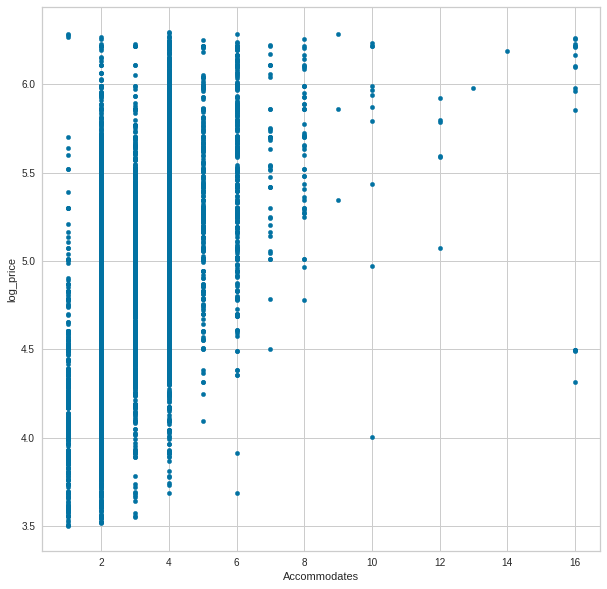

In [ ]:
train2.plot.scatter(x='Accommodates',y='log_price',figsize=(10,10));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


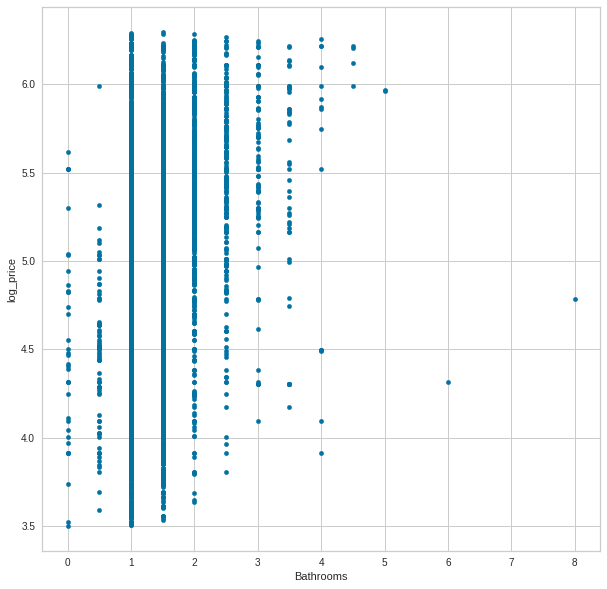

In [ ]:
train2.plot.scatter(x='Bathrooms',y='log_price',figsize=(10,10));

### FEATURE ENGINEERING

In [ ]:
data=train2.copy()

In [ ]:
data.head()

,Latitude,Longitude,Accommodates,Availability_365,Has_availability,Reviews_per_month,Calculated_host_listings_count,Instant_bookable,Room_type,Bedrooms,Beds,Bathrooms,Bathrooms_type,Neighbourhood_cleansed,Number_of_reviews,Number_of_reviews_l30d,Review_scores_rating,Review_scores_accuracy,Review_scores_checkin,Review_scores_cleanliness,Review_scores_communication,Review_scores_location,Review_scores_value,Amenity_Count,log_price
0,52.35535,4.92149,2,0,1,0.25,3,1,Private room,1,1,1.0,private bath(s),Oud-Oost,9,0,98,10,10,10,10,10,9,5,4.382369
1,52.38951,4.87910,3,47,1,0.34,7,0,Private room,1,1,1.0,shared bath(s),Westerpark,12,0,86,9,9,8,9,9,9,12,4.191728
2,52.37418,4.96368,2,0,1,0.86,1,1,Private room,1,1,1.0,shared bath(s),IJburg - Zeeburgereiland,29,0,99,10,10,10,10,10,10,30,4.386128
3,52.37875,4.87558,2,0,1,0.17,2,0,Private room,1,2,2.0,shared bath(s),Westerpark,4,0,100,10,10,10,10,10,8,19,5.293305
4,52.36008,4.89182,2,283,1,1.09,1,0,Private room,1,1,1.0,private bath(s),Centrum-Oost,37,0,97,10,10,10,10,10,9,19,4.787492


In [ ]:
data=pd.get_dummies(data)
data.head()

,Latitude,Longitude,Accommodates,Availability_365,Has_availability,Reviews_per_month,Calculated_host_listings_count,Instant_bookable,Bedrooms,Beds,Bathrooms,Number_of_reviews,Number_of_reviews_l30d,Review_scores_rating,Review_scores_accuracy,Review_scores_checkin,Review_scores_cleanliness,Review_scores_communication,Review_scores_location,Review_scores_value,Amenity_Count,log_price,Room_type_Entire home/apt,Room_type_Hotel room,Room_type_Private room,Room_type_Shared room,Bathrooms_type_private bath(s),Bathrooms_type_shared bath(s),Neighbourhood_cleansed_Bijlmer-Centrum,Neighbourhood_cleansed_Bijlmer-Oost,Neighbourhood_cleansed_Bos en Lommer,Neighbourhood_cleansed_Buitenveldert - Zuidas,Neighbourhood_cleansed_Centrum-Oost,Neighbourhood_cleansed_Centrum-West,Neighbourhood_cleansed_De Aker - Nieuw Sloten,Neighbourhood_cleansed_De Baarsjes - Oud-West,Neighbourhood_cleansed_De Pijp - Rivierenbuurt,Neighbourhood_cleansed_Gaasperdam - Driemond,Neighbourhood_cleansed_Geuzenveld - Slotermeer,Neighbourhood_cleansed_IJburg - Zeeburgereiland,Neighbourhood_cleansed_Noord-Oost,Neighbourhood_cleansed_Noord-West,Neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt,Neighbourhood_cleansed_Osdorp,Neighbourhood_cleansed_Oud-Noord,Neighbourhood_cleansed_Oud-Oost,Neighbourhood_cleansed_Slotervaart,Neighbourhood_cleansed_Watergraafsmeer,Neighbourhood_cleansed_Westerpark,Neighbourhood_cleansed_Zuid
0,52.35535,4.92149,2,0,1,0.25,3,1,1,1,1.0,9,0,98,10,10,10,10,10,9,5,4.382369,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,52.38951,4.87910,3,47,1,0.34,7,0,1,1,1.0,12,0,86,9,9,8,9,9,9,12,4.191728,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,52.37418,4.96368,2,0,1,0.86,1,1,1,1,1.0,29,0,99,10,10,10,10,10,10,30,4.386128,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,52.37875,4.87558,2,0,1,0.17,2,0,1,2,2.0,4,0,100,10,10,10,10,10,8,19,5.293305,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,52.36008,4.89182,2,283,1,1.09,1,0,1,1,1.0,37,0,97,10,10,10,10,10,9,19,4.787492,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18457 entries, 0 to 18781
Data columns (total 50 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Latitude                                                       18457 non-null  float64
 1   Longitude                                                      18457 non-null  float64
 2   Accommodates                                                   18457 non-null  int64  
 3   Availability_365                                               18457 non-null  int64  
 4   Has_availability                                               18457 non-null  int64  
 5   Reviews_per_month                                              18457 non-null  float64
 6   Calculated_host_listings_count                                 18457 non-null  int64  
 7   Instant_bookable                                          

### DATA PREPARATION

In [ ]:
x=data.copy().drop('log_price',axis=1)
y=data['log_price'].copy()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
baseline=y_train.median()
baseline_error=np.sqrt(mean_squared_error(y_pred=np.ones_like(y_test)*baseline,y_true=y_test))
baseline_error

0.47898857157790825

### **MACHINE LEARNING**

In [ ]:
lr=LinearRegression()
alphas=[1000,100,50,20,10,1,0.1,0.01]
l1_ratios=[0.001,0.01,0.05,0.1,0.3,0.5,0.7,0.9]
ridge=RidgeCV(alphas=alphas)
lasso=LassoCV(alphas=alphas,max_iter=10000)
elastic=ElasticNetCV(alphas=alphas,l1_ratio=l1_ratios)

In [ ]:
for model,name in zip([lr,ridge,lasso,elastic],['LinearRegression','Ridge','Lasso','ElasticNet']):
  model.fit(x_train_scaled,y_train)
  y_pred_train=model.predict(x_train_scaled)
  mrse_train=np.sqrt(mean_squared_error(y_pred=y_pred_train,y_true=y_train))
  y_pred=model.predict(x_test_scaled)
  mrse_test=np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test))
  best_alpha=''
  if name !='LinearRegression':
    best_alpha='best_alpha:'+str(model.alpha_)
  best_l1=''
  if name =='ElasticNet':
    best_l1='best_l1:'+str(model.l1_ratio_)
  print(name+'mrse_train:'+str(mrse_train)+',mrse_test:'+str(mrse_test)+best_alpha+best_l1)


LinearRegressionmrse_train:0.3294233214709293,mrse_test:0.33683670679676875
Ridgemrse_train:0.32943298985916475,mrse_test:0.33678674329232416best_alpha:20.0
Lassomrse_train:0.33648004805772225,mrse_test:0.3437489338682565best_alpha:0.01
ElasticNetmrse_train:0.3296401533384286,mrse_test:0.3368380977399264best_alpha:0.01best_l1:0.001


###LASSO REGRESSION

In [ ]:
y_pred_train=lasso.predict(x_train_scaled)
y_pred=lasso.predict(x_test_scaled)

In [ ]:
from pandas import Series, DataFrame
coeff = pd.DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lasso.coef_)
coeff

,0,Coefficient Estimate
0,Latitude,0.000000e+00
1,Longitude,-0.000000e+00
2,Accommodates,1.467341e-01
3,Availability_365,5.068574e-02
4,Has_availability,0.000000e+00
5,Reviews_per_month,-0.000000e+00
6,Calculated_host_listings_count,1.584998e-02
7,Instant_bookable,3.678340e-03
8,Bedrooms,5.818458e-02
9,Beds,0.000000e+00


In [ ]:
order=np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
  coef_=lasso.coef_[i]
  if coef_!=0:
    print(x.columns[i]+ ':'+str(lasso.coef_[i]))

Accommodates:0.14673409893023528
Room_type_Private room:-0.0964784828979682
Neighbourhood_cleansed_Centrum-West:0.06995869007429147
Bedrooms:0.0581845775266318
Room_type_Entire home/apt:0.057244750478362944
Amenity_Count:0.05486259048856841
Availability_365:0.050685735516026835
Neighbourhood_cleansed_Centrum-Oost:0.04403067361455207
Number_of_reviews:-0.030659558338134132
Bathrooms:0.024453127300171924
Neighbourhood_cleansed_Noord-West:-0.0221461508432989
Neighbourhood_cleansed_De Pijp - Rivierenbuurt:0.02110743850280714
Bathrooms_type_private bath(s):0.018415882719926523
Neighbourhood_cleansed_Bos en Lommer:-0.016056669878520544
Calculated_host_listings_count:0.015849977311532874
Neighbourhood_cleansed_Gaasperdam - Driemond:-0.015518234186780762
Neighbourhood_cleansed_Noord-Oost:-0.014914578294117636
Neighbourhood_cleansed_Geuzenveld - Slotermeer:-0.012839466687270923
Neighbourhood_cleansed_Bijlmer-Oost:-0.012495706646372305
Neighbourhood_cleansed_Oud-Noord:-0.011388786397607473
Neigh

In [ ]:
order=np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
  coef_=lasso.coef_[i]
  if coef_==0:
    print(x.columns[i]+ ','+str(lasso.coef_[i]))

Room_type_Hotel room,0.0
Longitude,-0.0
Neighbourhood_cleansed_Oud-Oost,0.0
Has_availability,0.0
Reviews_per_month,-0.0
Review_scores_cleanliness,-0.0
Review_scores_checkin,-0.0
Beds,0.0
Review_scores_location,-0.0
Review_scores_communication,-0.0
Number_of_reviews_l30d,-0.0
Review_scores_rating,-0.0
Review_scores_accuracy,-0.0
Latitude,0.0


In [ ]:
from sklearn.metrics import explained_variance_score
print('Explained variance:',explained_variance_score(y_true=y_test, y_pred=y_pred, multioutput='uniform_average'))

Explained variance: 0.48358861244535256


In [ ]:
from sklearn.metrics import max_error
y_pred=lasso.predict(x_test_scaled)
print('Maximum error:',max_error(y_true=y_test, y_pred=y_pred))

Maximum error: 2.5129276810103933


In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error:',mean_absolute_error(y_true=y_test, y_pred=y_pred))

Mean absolute error: 0.2620046185008555


In [ ]:
from sklearn.metrics import r2_score
print('R Squared:',r2_score(y_true=y_test, y_pred=y_pred))

R Squared: 0.48356249967379306


In [ ]:
print('Mean Squared error',mean_squared_error(y_true=y_test, y_pred=y_pred))

Mean Squared error 0.118163329535563


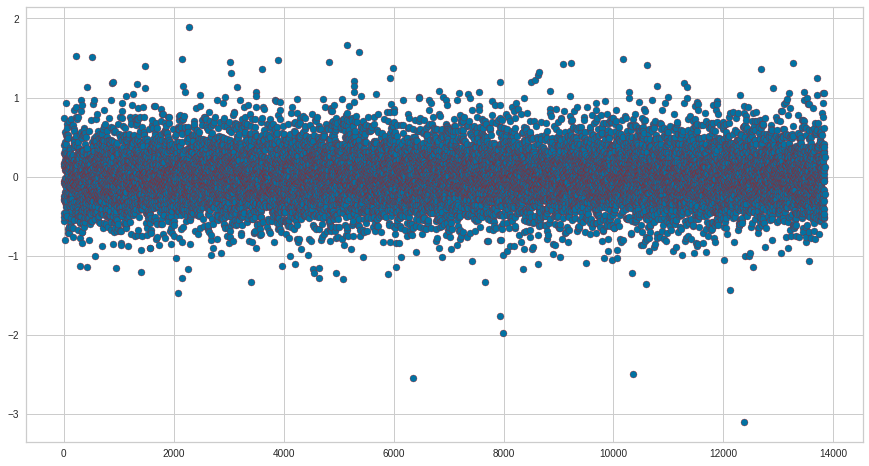

In [ ]:
y_pred_train=lasso.predict(x_train_scaled)
diff=y_train-y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)),diff,edgecolors='r')

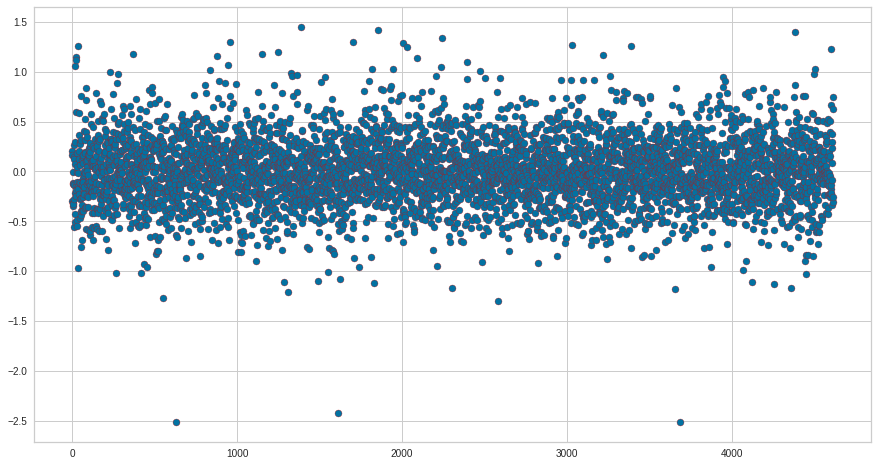

In [ ]:
y_pred_train=lasso.predict(x_train_scaled)
diff=y_test-y_pred
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)),diff,edgecolors='r')

0.48356249967379306

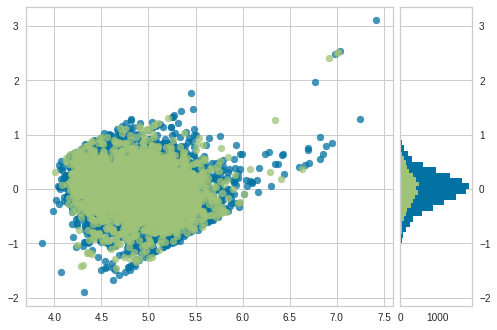

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lasso, hist=True)
visualizer.fit(x_train_scaled, y_train)
visualizer.score(x_test_scaled, y_test)

### RIDGE REGRESSION

In [ ]:
ridge.fit(x_train_scaled,y_train)
y_pred_train=ridge.predict(x_train_scaled)
y_pred=ridge.predict(x_test_scaled)

In [ ]:
import math
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
mrse=np.sqrt(mse)


In [ ]:
from pandas import Series, DataFrame
coeff = pd.DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(ridge.coef_)
coeff

,0,Coefficient Estimate
0,Latitude,0.000437
1,Longitude,0.025028
2,Accommodates,0.159504
3,Availability_365,0.060019
4,Has_availability,0.000000
5,Reviews_per_month,0.002075
6,Calculated_host_listings_count,0.020135
7,Instant_bookable,0.015272
8,Bedrooms,0.068239
9,Beds,-0.012726


In [ ]:
order=np.argsort(np.abs(ridge.coef_))[::-1]
for i in order:
  coef_=ridge.coef_[i]
  if coef_!=0:
    print(x.columns[i]+ ':'+str(ridge.coef_[i]))

Accommodates:0.159503644391226
Review_scores_value:-0.10269759997829857
Review_scores_rating:0.10013400671893202
Review_scores_cleanliness:0.0937845298443047
Review_scores_location:0.09167757269821082
Review_scores_communication:-0.08699133286627514
Room_type_Private room:-0.08180439883447252
Room_type_Entire home/apt:0.08008332149073065
Bedrooms:0.0682386310508129
Neighbourhood_cleansed_Centrum-West:0.06775415233867482
Amenity_Count:0.06332708146401009
Review_scores_checkin:-0.061098003636357756
Availability_365:0.06001900626721398
Number_of_reviews:-0.04598981567252161
Review_scores_accuracy:-0.04466298167919311
Neighbourhood_cleansed_Centrum-Oost:0.04019963147039666
Neighbourhood_cleansed_Noord-West:-0.036072074967907444
Neighbourhood_cleansed_Gaasperdam - Driemond:-0.03329894142202289
Neighbourhood_cleansed_Noord-Oost:-0.03221177708091109
Bathrooms:0.0319021604688563
Neighbourhood_cleansed_IJburg - Zeeburgereiland:-0.030244812433174326
Neighbourhood_cleansed_Oud-Noord:-0.0298853157

In [ ]:
order=np.argsort(np.abs(ridge.coef_))[::-1]
for i in order:
  coef_=ridge.coef_[i]
  if coef_==0:
    print(x.columns[i]+ ':'+str(ridge.coef_[i]))

Has_availability:0.0


In [ ]:
from sklearn.metrics import explained_variance_score
print('Explained variance:',explained_variance_score(y_true=y_test, y_pred=y_pred, multioutput='uniform_average'))

Explained variance: 0.5043045878708837


In [ ]:
from sklearn.metrics import max_error
y_pred=ridge.predict(x_test_scaled)
print('Maximum error:',max_error(y_true=y_test, y_pred=y_pred))

Maximum error: 2.5004098649700355


In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error:',mean_absolute_error(y_true=y_test, y_pred=y_pred))

Mean absolute error: 0.25468765083162376


In [ ]:
from sklearn.metrics import r2_score
print('R Squared:',r2_score(y_true=y_test, y_pred=y_pred))

R Squared: 0.5042701992521313


In [ ]:
print('Mean Squared error',mean_squared_error(y_true=y_test, y_pred=y_pred))

Mean Squared error 0.11342531045744986


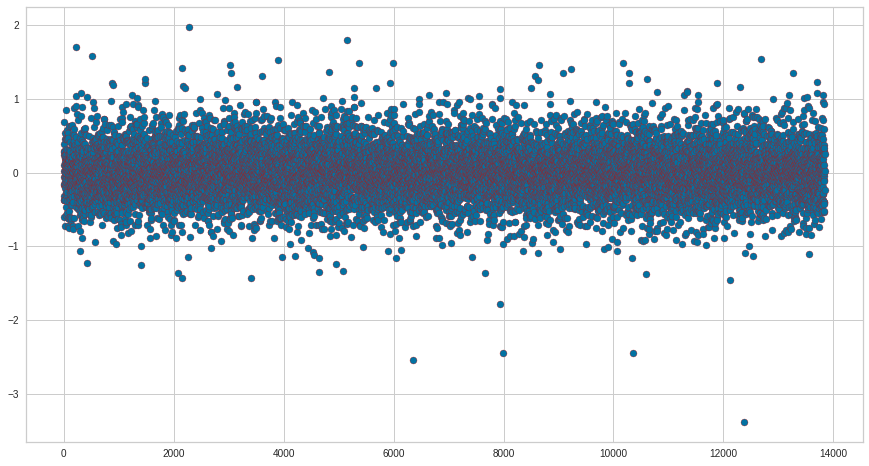

In [ ]:
y_pred_train=ridge.predict(x_train_scaled)
diff=y_train-y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)),diff,edgecolors='r')

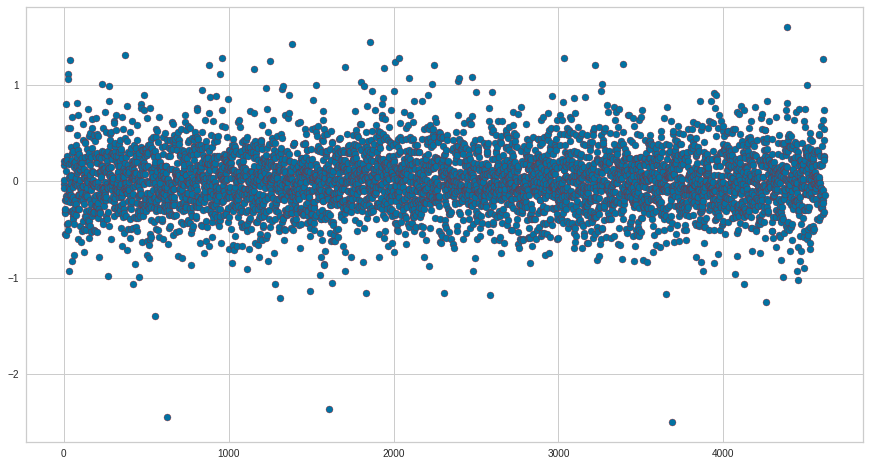

In [ ]:
y_pred_train=ridge.predict(x_train_scaled)
diff=y_test-y_pred
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)),diff,edgecolors='r')

0.5042701992521313

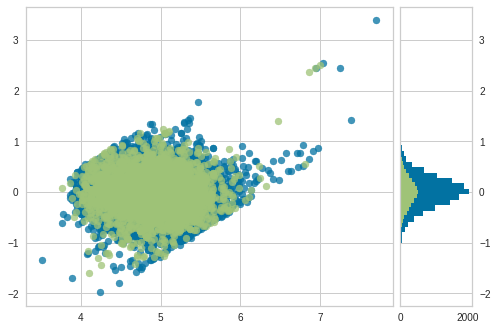

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(ridge, hist=True)
visualizer.fit(x_train_scaled, y_train)
visualizer.score(x_test_scaled, y_test)

### LINEAR REGRESSION

In [ ]:
y_pred_train=lr.predict(x_train_scaled)
y_pred=lr.predict(x_test_scaled)

In [ ]:
from pandas import Series, DataFrame
coeff = pd.DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lr.coef_)
coeff

,0,Coefficient Estimate
0,Latitude,3.412202e-04
1,Longitude,2.633613e-02
2,Accommodates,1.601077e-01
3,Availability_365,6.006907e-02
4,Has_availability,7.060327e+10
5,Reviews_per_month,2.187622e-03
6,Calculated_host_listings_count,2.005288e-02
7,Instant_bookable,1.528864e-02
8,Bedrooms,6.818651e-02
9,Beds,-1.319681e-02


In [ ]:
order=np.argsort(np.abs(lr.coef_))[::-1]
for i in order:
  coef_=lr.coef_[i]
  if coef_!=0:
    print(x.columns[i]+ ':'+str(lr.coef_[i]))

Bathrooms_type_shared bath(s):-73350125512.99168
Bathrooms_type_private bath(s):-73350125512.95845
Has_availability:70603265405.28688
Room_type_Entire home/apt:48573964388.9935
Room_type_Private room:47930669455.20232
Neighbourhood_cleansed_De Baarsjes - Oud-West:41306201131.90407
Neighbourhood_cleansed_De Pijp - Rivierenbuurt:36905942057.24484
Neighbourhood_cleansed_Centrum-West:34182344677.150112
Neighbourhood_cleansed_Centrum-Oost:31594878295.699345
Neighbourhood_cleansed_Westerpark:30286654636.889507
Neighbourhood_cleansed_Zuid:29601265860.41714
Neighbourhood_cleansed_Oud-Oost:27401079385.578472
Neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt:24299472400.021076
Neighbourhood_cleansed_Bos en Lommer:24199108566.1176
Neighbourhood_cleansed_Oud-Noord:19865463107.88877
Neighbourhood_cleansed_Watergraafsmeer:18406559415.00725
Neighbourhood_cleansed_IJburg - Zeeburgereiland:17183360918.02709
Neighbourhood_cleansed_Slotervaart:16573003056.829191
Neighbourhood_cleansed_Noord-W

In [ ]:
order=np.argsort(np.abs(lr.coef_))[::-1]
for i in order:
  coef_=lr.coef_[i]
  if coef_==0:
    print(x.columns[i]+ ','+str(lr.coef_[i]))

In [ ]:
from sklearn.metrics import explained_variance_score
print('Explained variance:',explained_variance_score(y_true=y_test, y_pred=y_pred, multioutput='uniform_average'))

Explained variance: 0.5041557162464727


In [ ]:
from sklearn.metrics import max_error
y_pred=lr.predict(x_test_scaled)
print('Maximum error:',max_error(y_true=y_test, y_pred=y_pred))

Maximum error: 2.4972850174590127


In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error:',mean_absolute_error(y_true=y_test, y_pred=y_pred))

Mean absolute error: 0.2547126343426107


In [ ]:
from sklearn.metrics import r2_score
print('R Squared:',r2_score(y_true=y_test, y_pred=y_pred))

R Squared: 0.5041231018034577


In [ ]:
print('Mean Squared error',mean_squared_error(y_true=y_test, y_pred=y_pred))

Mean Squared error 0.11345896704569237


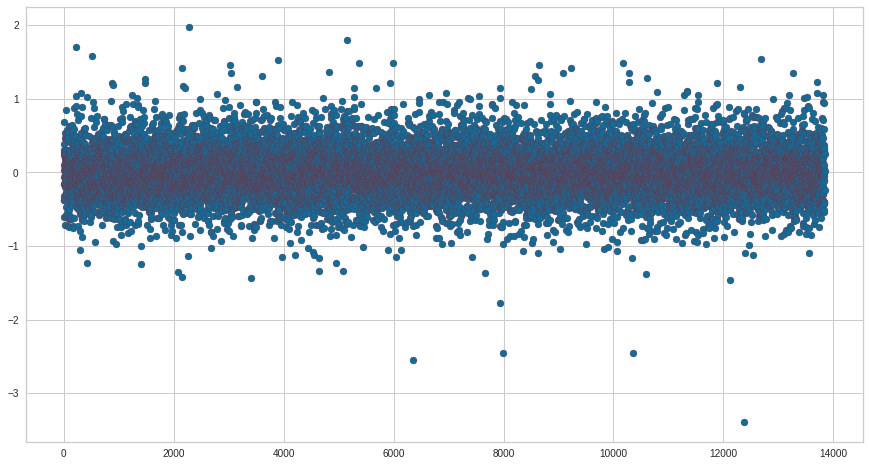

In [ ]:
y_pred_train=lr.predict(x_train_scaled)
diff=y_train-y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)),diff,edgecolors='r')

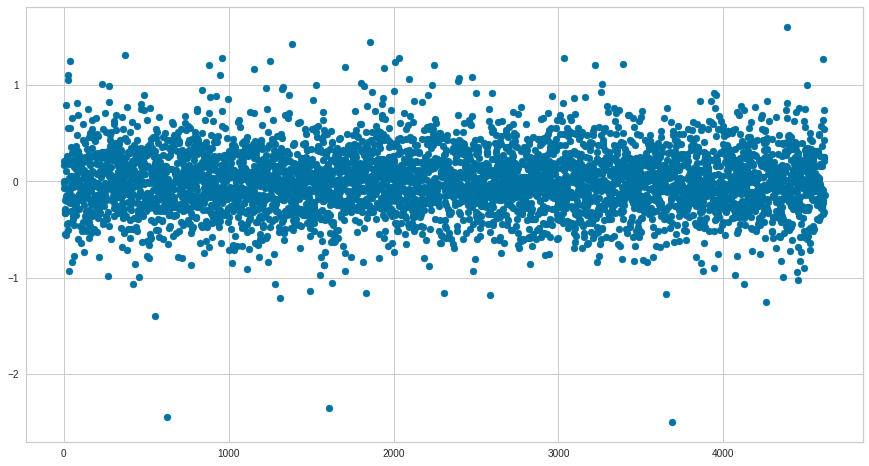

In [ ]:
y_pred_train=lr.predict(x_train_scaled)
diff=y_test-y_pred
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)),diff)

0.5041231018034577

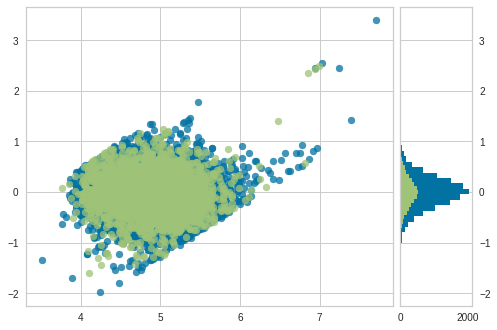

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lr, hist=True)
visualizer.fit(x_train_scaled, y_train)
visualizer.score(x_test_scaled, y_test)

### ELASTIC NET REGRESSION

In [ ]:
y_pred_train=elastic.predict(x_train_scaled)
y_pred=elastic.predict(x_test_scaled)

In [ ]:
from pandas import Series, DataFrame
coeff = pd.DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(elastic.coef_)
coeff

,0,Coefficient Estimate
0,Latitude,0.000934
1,Longitude,0.018584
2,Accommodates,0.156018
3,Availability_365,0.059707
4,Has_availability,0.000000
5,Reviews_per_month,0.001165
6,Calculated_host_listings_count,0.020498
7,Instant_bookable,0.015167
8,Bedrooms,0.068212
9,Beds,-0.009828


In [ ]:
order=np.argsort(np.abs(elastic.coef_))[::-1]
for i in order:
  coef_=elastic.coef_[i]
  if coef_!=0:
    print(x.columns[i]+ ':'+str(elastic.coef_[i]))

Accommodates:0.15601777961421406
Room_type_Private room:-0.08161290472731204
Room_type_Entire home/apt:0.07980831189166894
Review_scores_cleanliness:0.07759144142137224
Review_scores_value:-0.07400290136098966
Bedrooms:0.0682124239407797
Neighbourhood_cleansed_Centrum-West:0.06800256734865558
Review_scores_location:0.06568110878853137
Amenity_Count:0.06349204167905545
Availability_365:0.059706812775906275
Review_scores_communication:-0.05866095462612383
Review_scores_rating:0.05618394773558375
Review_scores_checkin:-0.049799334154141235
Number_of_reviews:-0.04521872583286875
Neighbourhood_cleansed_Centrum-Oost:0.04122412404834805
Neighbourhood_cleansed_Noord-West:-0.03607325193445844
Bathrooms:0.03200759712163131
Neighbourhood_cleansed_Gaasperdam - Driemond:-0.03170522389923115
Neighbourhood_cleansed_Noord-Oost:-0.031098770869095762
Neighbourhood_cleansed_Oud-Noord:-0.029212646546541054
Neighbourhood_cleansed_IJburg - Zeeburgereiland:-0.027364279491085487
Neighbourhood_cleansed_Bijlmer

In [ ]:
order=np.argsort(np.abs(elastic.coef_))[::-1]
for i in order:
  coef_=elastic.coef_[i]
  if coef_==0:
    print(x.columns[i]+ ','+str(elastic.coef_[i]))

Has_availability,0.0


In [ ]:
from sklearn.metrics import explained_variance_score
print('Explained variance:',explained_variance_score(y_true=y_test, y_pred=y_pred, multioutput='uniform_average'))

Explained variance: 0.5041594150607276


In [ ]:
from sklearn.metrics import max_error
y_pred=elastic.predict(x_test_scaled)
print('Maximum error:',max_error(y_true=y_test, y_pred=y_pred))

Maximum error: 2.521005433213902


In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error:',mean_absolute_error(y_true=y_test, y_pred=y_pred))

Mean absolute error: 0.2547443835145845


In [ ]:
from sklearn.metrics import r2_score
print('R Squared:',r2_score(y_true=y_test, y_pred=y_pred))

R Squared: 0.5041190064184313


In [ ]:
print('Mean Squared error',mean_squared_error(y_true=y_test, y_pred=y_pred)) 

Mean Squared error 0.1134599040890522


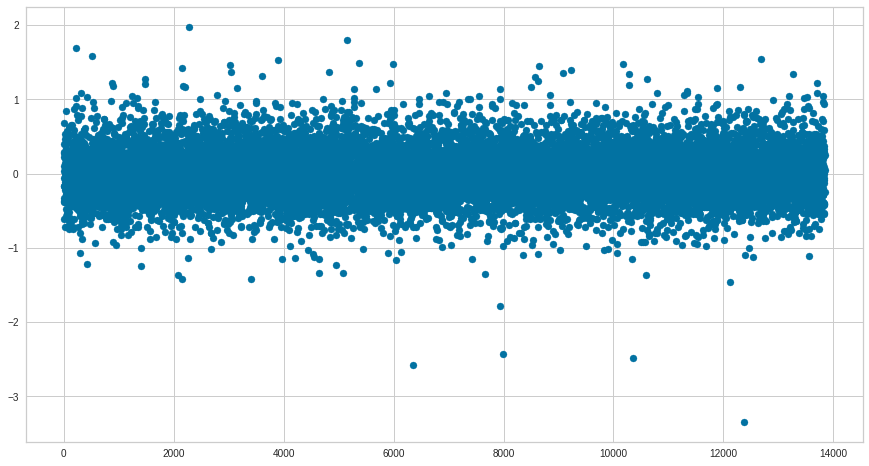

In [ ]:
y_pred_train=elastic.predict(x_train_scaled)
diff=y_train-y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)),diff)

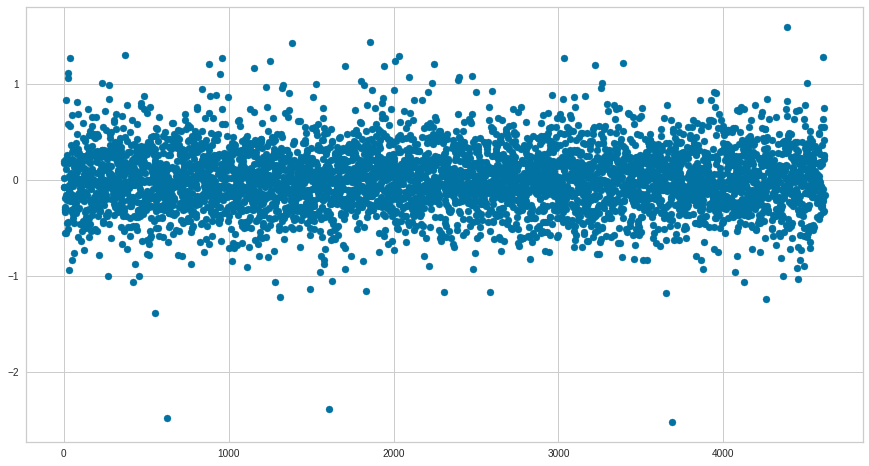

In [ ]:
y_pred_train=elastic.predict(x_train_scaled)
diff=y_test-y_pred
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)),diff)

0.5041190064184313

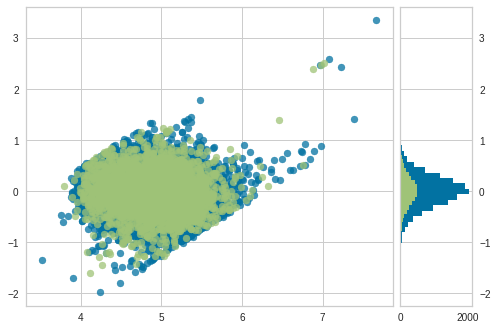

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(elastic, hist=True)
visualizer.fit(x_train_scaled, y_train)
visualizer.score(x_test_scaled, y_test)

### RANDOM FOREST

In [ ]:
random=RandomForestRegressor(n_estimators =100, random_state = 0) 
random.fit(x_train_scaled,y_train)
y_pred_train=random.predict(x_train_scaled)
y_pred=random.predict(x_test_scaled)
mse_train=mean_squared_error(y_pred=y_pred_train,y_true=y_train)
mrse_train=np.sqrt(mse_train)
mse_test=mean_squared_error(y_pred=y_pred,y_true=y_test)
mrse_test=np.sqrt(mse_test)

In [ ]:
from pandas import Series, DataFrame
coeff = pd.DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(random.feature_importances_)
coeff

,0,Coefficient Estimate
0,Latitude,0.085215
1,Longitude,0.102277
2,Accommodates,0.280778
3,Availability_365,0.045055
4,Has_availability,0.000000
5,Reviews_per_month,0.047041
6,Calculated_host_listings_count,0.022844
7,Instant_bookable,0.008145
8,Bedrooms,0.024557
9,Beds,0.016114


In [ ]:
order=np.argsort(np.abs(random.feature_importances_))[::-1]
for i in order:
  coef_=random.feature_importances_[i]
  if coef_!=0:
    print(x.columns[i]+ ':'+str(random.feature_importances_[i]))

Accommodates:0.28077840701167145
Longitude:0.10227736839748787
Latitude:0.08521500093992228
Amenity_Count:0.06393005759640151
Room_type_Entire home/apt:0.05471125816849588
Reviews_per_month:0.04704071978932197
Availability_365:0.04505487459581171
Room_type_Private room:0.04396909777872043
Number_of_reviews:0.03817679210458663
Bathrooms:0.03202919167537058
Bedrooms:0.02455661749805
Review_scores_rating:0.02375110289407401
Calculated_host_listings_count:0.022844074353206446
Neighbourhood_cleansed_Centrum-West:0.020990131117520513
Beds:0.01611433689219315
Review_scores_location:0.011968902712401521
Review_scores_value:0.00924658050337142
Neighbourhood_cleansed_Centrum-Oost:0.008984564695263498
Review_scores_cleanliness:0.008693314334688774
Instant_bookable:0.008144847889976601
Review_scores_checkin:0.006108491945346327
Review_scores_accuracy:0.005176547409512686
Review_scores_communication:0.004514673498631087
Bathrooms_type_shared bath(s):0.004183694555616095
Number_of_reviews_l30d:0.003

In [ ]:
from sklearn.metrics import explained_variance_score
print('Explained variance:',explained_variance_score(y_true=y_test, y_pred=y_pred, multioutput='uniform_average'))

Explained variance: 0.5428280394313825


In [ ]:
from sklearn.metrics import r2_score
print('R Squared:',r2_score(y_true=y_test, y_pred=y_pred))

R Squared: 0.5427979741133525


In [ ]:
from sklearn.metrics import max_error
print('Maximum error:',max_error(y_true=y_test, y_pred=y_pred))

Maximum error: 1.7587887148396484


In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error:',mean_absolute_error(y_true=y_test, y_pred=y_pred))

Mean absolute error: 0.24532003670760416


In [ ]:
print('Mean Squared error train',mse_train)

Mean Squared error train 0.014358024470681343


In [ ]:
print('Mean root squared error train',mrse_train)

Mean root squared error train 0.11982497431955219


In [ ]:
print('Mean squared error test',mse_test)

Mean squared error test 0.10460997432418528


In [ ]:
print('Mean root squared error test',mrse_test)

Mean root squared error test 0.32343465232436874


In [ ]:
mrse_train_random=np.sqrt(mean_squared_error(y_pred=y_pred_train,y_true=y_train))

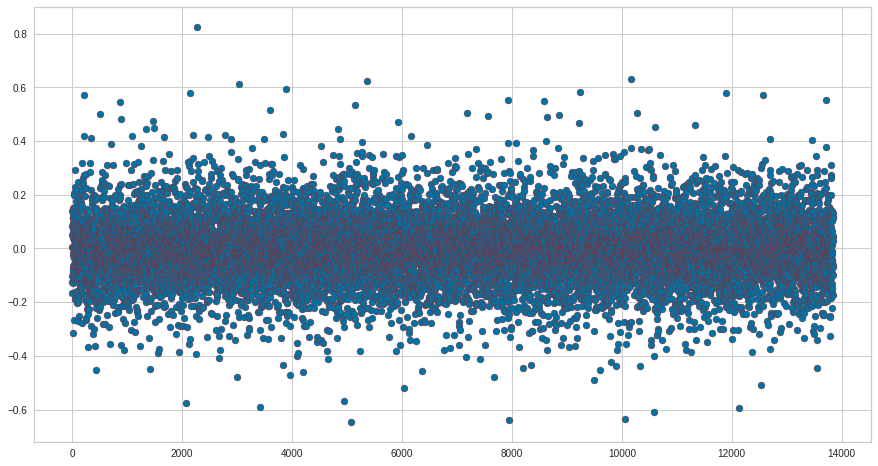

In [ ]:
diff=y_train-y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)),diff,edgecolors='r')

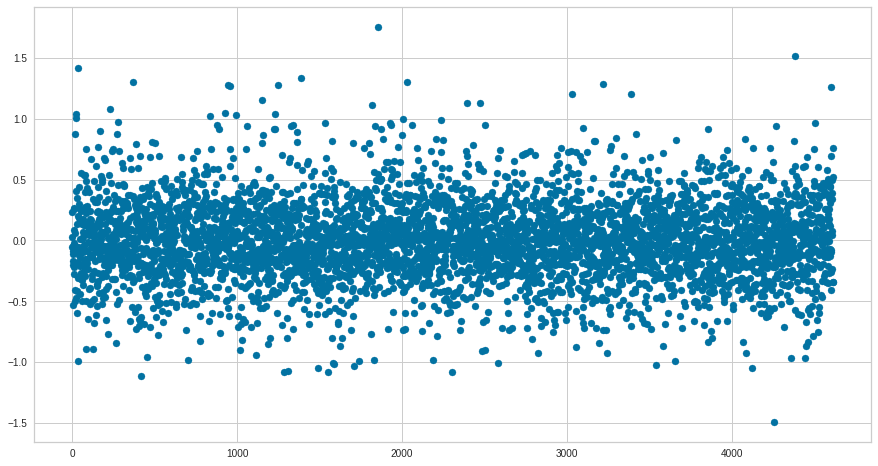

In [ ]:
diff=y_test-y_pred
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)),diff)

0.5427979741133525

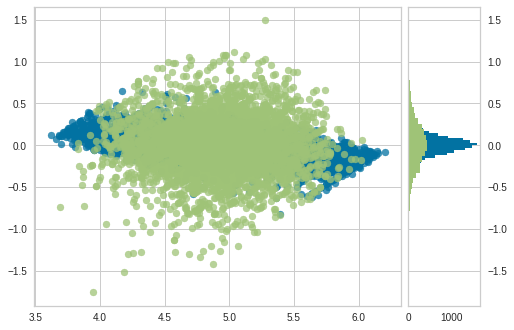

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(random, hist=True)
visualizer.fit(x_train_scaled, y_train)
visualizer.score(x_test_scaled, y_test)

In [ ]:
 from sklearn.model_selection import cross_val_score
 scores = cross_val_score(random, x, y, cv=5)

In [ ]:
scores

array([0.50852373, 0.56591669, 0.54974957, 0.55015885, 0.5379691 ])

### DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train_scaled,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = tree.predict(x_test_scaled)

In [ ]:
y_pred

array([5.04195696, 4.29603591, 3.55534806, ..., 4.40621795, 4.78749174,
       5.70044357])

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
4241,5.189144,5.041957
3629,4.744932,4.296036
10386,3.912023,3.555348
16598,4.398163,4.350049
4762,4.661732,4.868061
...,...,...
11134,5.204007,5.010635
8280,5.857933,5.857933
13263,4.494591,4.406218
4302,5.521461,4.787492


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred, squared=False))

Mean Absolute Error: 0.3478603152719006
Mean Squared Error: 0.2078915100206576
Root Mean Squared Error: 0.45595121451823944


### Undervalued and Overvalued

In [ ]:
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)
random_fit=pd.DataFrame(random.predict(x_scaled))
mrse_tests=np.sqrt(mean_squared_error(y_pred=random_fit,y_true=y))
mrse_tests

0.21301650317040458

In [ ]:
predicted_log_price=pd.DataFrame()
predicted_log_price=random_fit

In [ ]:
train['Predicted_log_price']=predicted_log_price


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import math
predicted_price=np.exp(predicted_log_price)
train['predicted_price']=predicted_price
train.isna().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Property_Key                        0
Property_ID                         0
Latitude                            0
Longitude                           0
Accommodates                        0
Availability_365                    0
Has_availability                    0
Reviews_per_month                   0
Calculated_host_listings_count      0
Property_type                       0
Instant_bookable                    0
Room_type                           0
Bedrooms                            0
Beds                                0
Bathrooms                           0
Bathrooms_type                      0
Neighbourhood_cleansed              0
Number_of_reviews                   0
Number_of_reviews_l30d              0
Review_scores_rating                0
Review_scores_accuracy              0
Review_scores_checkin               0
Review_scores_cleanliness           0
Review_scores_communication         0
Review_scores_location              0
Review_scores_value                 0
Amenity_Coun

In [ ]:
predicted_values=pd.DataFrame()
predicted_values['property_key']=train['Property_Key']
predicted_values['propertyId']=train['Property_ID']
predicted_values['predicted_log_price']=train['Predicted_log_price']
predicted_values['log_price']=train['log_price']
predicted_values['difference_log']=predicted_values['predicted_log_price']-predicted_values['log_price']
predicted_values['predicted_price']=train['predicted_price']
predicted_values['price']=train['avgprice']
predicted_values['difference']=predicted_values['predicted_price']-predicted_values['price']
predicted_values=predicted_values.dropna()
predicted_values

,property_key,propertyId,predicted_log_price,log_price,difference_log,predicted_price,price,difference
0,1783,21362019,4.488164,4.382369,0.105795,88.957967,80.027397,8.930570
1,1784,21687136,4.264043,4.191728,0.072315,71.096844,66.136986,4.959857
2,1785,22273164,4.422240,4.386128,0.036112,83.282600,80.328767,2.953833
3,1786,22340003,4.469954,5.293305,-0.823351,87.352681,199.000000,-111.647319
4,1787,22366904,4.772108,4.787492,-0.015383,118.168117,120.000000,-1.831883
...,...,...,...,...,...,...,...,...
18451,8669,15121800,5.391257,4.681040,0.710217,219.479071,107.882192,111.596879
18452,8670,15122597,5.223645,4.693758,0.529887,185.609424,109.263014,76.346411
18453,8671,15176278,4.983158,4.788150,0.195008,145.934584,120.079019,25.855564
18454,8672,15232523,4.503521,4.605170,-0.101649,90.334638,100.000000,-9.665362


In [ ]:
predicted_values.head()

,property_key,propertyId,predicted_log_price,log_price,difference_log,predicted_price,price,difference
0,1783,21362019,4.488164,4.382369,0.105795,88.957967,80.027397,8.930570
1,1784,21687136,4.264043,4.191728,0.072315,71.096844,66.136986,4.959857
2,1785,22273164,4.422240,4.386128,0.036112,83.282600,80.328767,2.953833
3,1786,22340003,4.469954,5.293305,-0.823351,87.352681,199.000000,-111.647319
4,1787,22366904,4.772108,4.787492,-0.015383,118.168117,120.000000,-1.831883


In [ ]:
predicted_values.describe()

,property_key,propertyId,predicted_log_price,log_price,difference_log,predicted_price,price,difference
count,18137.000000,1.813700e+04,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000
mean,9418.074599,2.023809e+07,4.902916,4.905867,-0.002950,144.912852,151.590191,-6.677339
std,5448.770916,1.259949e+07,0.382045,0.476788,0.608130,57.678593,78.018942,96.582056
min,1.000000,2.818000e+03,3.645605,3.500898,-2.366836,38.305927,33.145205,-475.493943
25%,4664.000000,9.848959e+06,4.666448,4.595148,-0.402570,106.319422,99.002740,-55.164735
50%,9539.000000,1.889427e+07,4.888055,4.887440,0.002753,132.695288,132.613699,0.318941
75%,14154.000000,3.002752e+07,5.153259,5.220356,0.400085,172.994315,185.000000,50.350951
max,18780.000000,4.578300e+07,6.168642,6.295918,2.201577,477.537022,542.353425,377.537022


In [ ]:
u_o=predicted_values.copy()
u_o.drop(u_o.index[abs(u_o['difference_log'])<mrse_tests],inplace = True)
u_o.drop(u_o.index[u_o['predicted_log_price']<0],inplace = True)
u_o=u_o.drop(columns=['predicted_log_price', 'log_price','difference_log'])
u_o




,property_key,propertyId,predicted_price,price,difference
3,1786,22340003,87.352681,199.000000,-111.647319
8,1791,15893795,74.889687,112.000000,-37.110313
10,1793,16130364,80.327395,64.452055,15.875340
18,1801,2774448,180.207339,249.000000,-68.792661
19,1802,2783156,114.786427,150.000000,-35.213573
...,...,...,...,...,...
18447,8665,7062895,170.068657,350.000000,-179.931343
18448,8666,10221568,133.765020,199.000000,-65.234980
18451,8669,15121800,219.479071,107.882192,111.596879
18452,8670,15122597,185.609424,109.263014,76.346411


In [ ]:
undervalued=pd.DataFrame(u_o.nlargest(100,['difference']))
undervalued

,property_key,propertyId,predicted_price,price,difference
7328,11276,34889719,477.537022,100.000000,377.537022
15417,14329,43753868,444.519861,90.000000,354.519861
8101,4445,10588554,418.504880,80.000000,338.504880
17456,7674,24646128,418.168448,80.019178,338.149270
13236,1695,21198240,401.153590,64.246575,336.907014
...,...,...,...,...,...
6940,16824,22609135,435.190188,192.876712,242.313476
3018,5671,9210690,331.169719,89.000000,242.169719
13416,15575,27811298,361.789161,120.000000,241.789161
7111,969,9404830,311.334459,70.084932,241.249528


In [ ]:
overvalued=pd.DataFrame(predicted_values.nsmallest(5000,['difference']))
overvalued

,property_key,propertyId,predicted_log_price,log_price,difference_log,predicted_price,price,difference
10850,17346,20046915,4.202593,6.295918,-2.093325,66.859482,542.353425,-475.493943
7463,11293,35669821,4.139029,6.285850,-2.146821,62.741858,536.920548,-474.178690
2249,423,31945123,4.319017,6.264473,-1.945456,75.114757,525.564384,-450.449627
16645,16072,13854467,3.919353,6.214608,-2.295255,50.367839,500.000000,-449.632161
9470,15204,44029315,3.990457,6.214608,-2.224151,54.079612,500.000000,-445.920388
...,...,...,...,...,...,...,...,...
6056,9519,18496295,4.844680,5.164786,-0.320106,127.062615,175.000000,-47.937385
5405,14890,30360453,4.844762,5.164786,-0.320024,127.072975,175.000000,-47.927025
10041,6335,36996769,4.738765,5.088948,-0.350183,114.292950,162.219178,-47.926228
14544,10428,22143276,4.625864,5.010635,-0.384772,102.090898,150.000000,-47.909102


0.7995318801002469

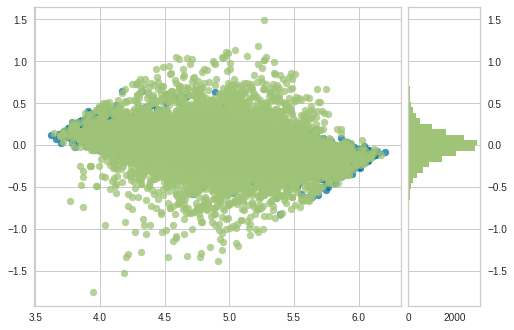

In [ ]:
visualizer = ResidualsPlot(random, hist=True)
visualizer.fit(x_train_scaled,y_train)
visualizer.score(x_scaled,y)

### Export

In [ ]:
predicted_values.to_csv(r'/content/predicted_values.csv')

In [ ]:
u_o.to_csv(r'/content/undervalued_overvalued.csv')

In [ ]:
overvalued.to_csv(r'/content/overvalued.csv')

In [ ]:
undervalued.to_csv(r'/content/undervalued.csv')

In [ ]:
coeff.to_excel(r'/content/random_forest.xls')

### Identify candidates based on their value and ratings whose hosts could be notified for increasing their price.

In [ ]:
train

,Property_Key,Property_ID,Latitude,Longitude,Accommodates,Availability_365,Has_availability,Reviews_per_month,Calculated_host_listings_count,Property_type,Instant_bookable,Room_type,Bedrooms,Beds,Bathrooms,Bathrooms_type,Neighbourhood_cleansed,Number_of_reviews,Number_of_reviews_l30d,Review_scores_rating,Review_scores_accuracy,Review_scores_checkin,Review_scores_cleanliness,Review_scores_communication,Review_scores_location,Review_scores_value,Amenity_Count,avgprice,log_price,Predicted_log_price,predicted_price
0,1783,21362019,52.35535,4.92149,2,0,1,0.25,3,Private room,1,Private room,1,1,1.0,private bath(s),Oud-Oost,9,0,98,10,10,10,10,10,9,5,80.027397,4.382369,4.488164,88.957967
1,1784,21687136,52.38951,4.87910,3,47,1,0.34,7,Private room,0,Private room,1,1,1.0,shared bath(s),Westerpark,12,0,86,9,9,8,9,9,9,12,66.136986,4.191728,4.264043,71.096844
2,1785,22273164,52.37418,4.96368,2,0,1,0.86,1,Private room,1,Private room,1,1,1.0,shared bath(s),IJburg - Zeeburgereiland,29,0,99,10,10,10,10,10,10,30,80.328767,4.386128,4.422240,83.282600
3,1786,22340003,52.37875,4.87558,2,0,1,0.17,2,Private room,0,Private room,1,2,2.0,shared bath(s),Westerpark,4,0,100,10,10,10,10,10,8,19,199.000000,5.293305,4.469954,87.352681
4,1787,22366904,52.36008,4.89182,2,283,1,1.09,1,Private room,0,Private room,1,1,1.0,private bath(s),Centrum-Oost,37,0,97,10,10,10,10,10,9,19,120.000000,4.787492,4.772108,118.168117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,8918,26907262,52.34411,4.89334,4,0,1,0.38,1,Entire house/apt,1,Entire home/apt,2,3,1.0,shared bath(s),De Pijp - Rivierenbuurt,10,0,100,10,10,10,10,10,10,10,164.484931,5.102819,NaN,NaN
18778,8919,26931465,52.36778,4.86445,2,2,1,0.72,1,Entire house/apt,0,Entire home/apt,1,1,1.5,shared bath(s),De Baarsjes - Oud-West,19,0,100,10,10,9,10,10,9,27,110.054794,4.700978,NaN,NaN
18779,8920,26943704,52.35295,4.84731,2,0,1,0.15,1,Entire house/apt,1,Entire home/apt,1,1,1.0,shared bath(s),Zuid,4,0,95,10,10,9,10,9,9,19,70.000000,4.248495,NaN,NaN
18780,8921,26953875,52.36586,4.87248,2,0,1,0.15,1,Entire house/apt,0,Entire home/apt,1,1,1.5,shared bath(s),De Baarsjes - Oud-West,4,0,100,10,10,10,10,10,10,14,110.000000,4.700480,NaN,NaN


In [ ]:
undervalued_pred=pd.read_csv('/content/undervalued.csv')

In [ ]:
undervalued_pred

,Unnamed: 0,Property_key,Property_ID,predicted_price,price,difference
0,7328,11276,34889719,477.537022,100.000000,377.537022
1,15417,14329,43753868,444.519861,90.000000,354.519861
2,8101,4445,10588554,418.504880,80.000000,338.504880
3,17456,7674,24646128,418.168448,80.019178,338.149270
4,13236,1695,21198240,401.153590,64.246575,336.907015
...,...,...,...,...,...,...
95,6940,16824,22609135,435.190188,192.876712,242.313476
96,3018,5671,9210690,331.169719,89.000000,242.169719
97,13416,15575,27811298,361.789161,120.000000,241.789161
98,7111,969,9404830,311.334459,70.084932,241.249528


In [ ]:
notify_hosts=pd.merge(train, undervalued_pred, on='Property_ID')

In [ ]:
notify_hosts


,Property_Key,Property_ID,Latitude,Longitude,Accommodates,Availability_365,Has_availability,Reviews_per_month,Calculated_host_listings_count,Property_type,Instant_bookable,Room_type,Bedrooms,Beds,Bathrooms,Bathrooms_type,Neighbourhood_cleansed,Number_of_reviews,Number_of_reviews_l30d,Review_scores_rating,Review_scores_accuracy,Review_scores_checkin,Review_scores_cleanliness,Review_scores_communication,Review_scores_location,Review_scores_value,Amenity_Count,avgprice,log_price,Predicted_log_price,predicted_price_x,Unnamed: 0,Property_key,predicted_price_y,price,difference
0,1901,1580062,52.36083,4.94265,3,365,1,0.00,2,Entire house/apt,0,Entire home/apt,2,3,1.5,shared bath(s),Oostelijk Havengebied - Indische Buurt,0,0,0,0,0,0,0,0,0,20,70.000000,4.248495,5.754450,315.591931,278,1901,315.591931,70.000000,245.591931
1,8960,28402693,52.37078,4.85878,2,0,1,0.00,1,Entire house/apt,0,Entire home/apt,1,1,1.5,shared bath(s),De Baarsjes - Oud-West,0,0,0,0,0,0,0,0,0,19,115.000000,4.744932,6.029073,415.329855,315,8960,415.329855,115.000000,300.329855
2,3699,41872384,52.34512,4.91476,2,0,1,0.50,1,Private room,0,Private room,1,1,1.5,shared bath(s),Watergraafsmeer,4,0,100,10,10,10,10,10,10,21,86.538251,4.460587,5.912662,369.688890,1284,3699,369.688890,86.538251,283.150638
3,18338,30879968,52.36696,4.88108,2,0,1,0.00,2,Entire house/apt,1,Entire home/apt,1,1,1.0,shared bath(s),Centrum-West,0,0,0,0,0,0,0,0,0,13,90.786885,4.508515,5.831102,340.733908,2307,18338,340.733908,90.786885,249.947023
4,479,4282186,52.35387,4.85975,2,172,1,5.67,1,Private room,0,Private room,1,1,1.0,shared bath(s),Zuid,408,0,97,10,10,9,10,10,9,16,65.172603,4.177039,5.811200,334.019641,2385,479,334.019641,65.172603,268.847038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8069,22163027,52.35096,4.85428,2,0,1,0.06,1,Private room,0,Private room,0,1,1.0,private bath(s),Zuid,2,0,0,0,0,0,0,0,0,10,44.000000,3.784190,5.860160,350.780259,17851,8069,350.780259,44.000000,306.780259
96,8070,22913973,52.37355,4.89988,2,0,1,2.83,1,Private room,1,Private room,1,1,1.0,private bath(s),Centrum-West,92,0,99,10,10,10,10,10,10,21,84.000000,4.430817,5.893942,362.832660,17852,8070,362.832660,84.000000,278.832660
97,8195,14795357,52.35112,4.85368,4,0,1,0.07,1,Entire house/apt,0,Entire home/apt,2,2,1.0,shared bath(s),Zuid,3,0,93,10,9,9,10,9,9,10,110.000000,4.700480,5.869985,354.243543,17977,8195,354.243543,110.000000,244.243543
98,8308,14271251,52.41516,4.89443,2,90,1,1.31,1,Entire house/apt,1,Entire home/apt,1,2,1.0,shared bath(s),Noord-West,56,0,92,9,10,9,10,9,9,16,95.000000,4.553877,5.853920,348.598377,18090,8308,348.598377,95.000000,253.598377


In [ ]:
# select review_score>=90 & no_of_reviews >=20
selected_hosts=notify_hosts.loc[(notify_hosts['Review_scores_rating'] >= 90) & (notify_hosts['Number_of_reviews'] >=20)]

In [ ]:
final_notified_hosts=selected_hosts[['Property_ID', 'Property_type','difference','price','predicted_price_y']]

In [ ]:
final_notified_hosts

,Property_ID,Property_type,difference,price,predicted_price_y
4,4282186,Private room,268.847038,65.172603,334.019641
7,8387594,Private room,267.060528,69.402740,336.463267
10,28375205,Private room,281.810560,38.000000,319.810560
11,652888,Entire house/apt,281.291530,88.452055,369.743585
16,31605566,Private room,324.059303,98.643836,422.703139
22,33339583,Private room,288.836320,44.008219,332.844539
23,1353295,Entire house/apt,250.956852,102.424657,353.381510
28,19235021,Entire house/apt,244.093306,130.000000,374.093306
30,6665729,Private room,279.813488,43.750685,323.564173
31,15797836,Private room,248.256349,75.000000,323.256349


In [ ]:
final_notified_hosts.to_csv('final_hosts1.csv')

In [ ]:
h= pd.read_csv('/content/final_notified_hosts1.csv')

In [ ]:
h

,Unnamed: 0,Property_ID,Property_type,difference,price,predicted_price_y
0,4,4282186,Private room,268.847038,65.172603,334.019641
1,7,8387594,Private room,267.060528,69.402740,336.463267
2,10,28375205,Private room,281.810560,38.000000,319.810560
3,11,652888,Entire house/apt,281.291530,88.452055,369.743585
4,16,31605566,Private room,324.059303,98.643836,422.703139
5,22,33339583,Private room,288.836320,44.008219,332.844539
6,23,1353295,Entire house/apt,250.956852,102.424657,353.381510
7,28,19235021,Entire house/apt,244.093306,130.000000,374.093306
8,30,6665729,Private room,279.813488,43.750685,323.564173
9,31,15797836,Private room,248.256349,75.000000,323.256349
